<a href="https://colab.research.google.com/github/michaelengh/github-slideshow/blob/main/08___Project1Part3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import numpy as np

Mounted at /content/drive


In [3]:
salesfile = '/content/drive/MyDrive/**Coding Dojo**/02 Week 2: Pandas/Files for Lessons/sales_predictions.csv'

df = pd.read_csv(salesfile)
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


item 1

In [4]:
df.shape

(8523, 12)

item 2

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


item 3

In [6]:
df.duplicated().sum()

0

item 4

In [7]:
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

item 5

In [8]:
null_vals = df.isna().sum()
nullx = null_vals[null_vals>0].index
nullx

Index(['Item_Weight', 'Outlet_Size'], dtype='object')

In [9]:
df = df.fillna(df.mean())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


In [ ]:
# replaced the null values in item weight with the mean value. will now skew low/high values and for overall mean value wont change drastically

In [10]:

df.isna().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [11]:
df.fillna('Missing', inplace=True)

In [ ]:
# only one column left with missing data that are characters so i filled with Missing

item 6

In [12]:
df.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [13]:
data_types = df.dtypes
data_types

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

item 7

In [14]:
df['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

item 7

In [15]:
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('LF','Low Fat')
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('low fat','Low Fat')
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('reg','Regular')
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

item 8

In [16]:
print('Min Item Weight:',df['Item_Weight'].min())
print('Min Item Visibility:',df['Item_Visibility'].min())
print('Min Item MRP:',df['Item_MRP'].min())
print('Min Est Year:',df['Outlet_Establishment_Year'].min())
print('Min Item Outlet Sales:',df['Item_Outlet_Sales'].min())
print('Avg Item Weight:',df['Item_Weight'].mean())
print('Avg Item Visibility:',df['Item_Visibility'].mean())
print('Avg Item MRP:',df['Item_MRP'].mean())
print('Avg Item Est Year:',df['Outlet_Establishment_Year'].mean())
print('Avg Item Outlet Sales:',df['Item_Outlet_Sales'].mean())
print('Max Item Weight:',df['Item_Weight'].max())
print('Max Item Visibility:',df['Item_Visibility'].max())
print('Max Item MRP:',df['Item_MRP'].max())
print('Max Item Est Year:',df['Outlet_Establishment_Year'].max())
print('Max Item Outlet Sales:',df['Item_Outlet_Sales'].max())

Min Item Weight: 4.555
Min Item Visibility: 0.0
Min Item MRP: 31.29
Min Est Year: 1985
Min Item Outlet Sales: 33.29
Avg Item Weight: 12.857645184136409
Avg Item Visibility: 0.06613202877895127
Avg Item MRP: 140.9927819781768
Avg Item Est Year: 1997.8318667135984
Avg Item Outlet Sales: 2181.2889135750365
Max Item Weight: 21.35
Max Item Visibility: 0.328390948
Max Item MRP: 266.8884
Max Item Est Year: 2009
Max Item Outlet Sales: 13086.9648


Project 1 - Part 3 (Core)

step1



In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

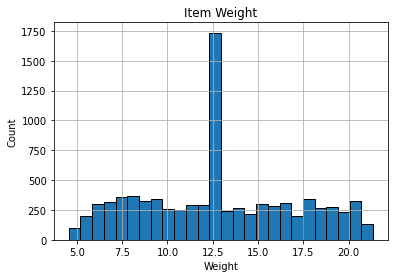

In [18]:
df['Item_Weight'].hist(bins = 'auto',edgecolor='black')
plt.title('Item Weight')
plt.ylabel('Count')
plt.xlabel('Weight');

with this histogram I can see that most items weigh in the 12-13 range

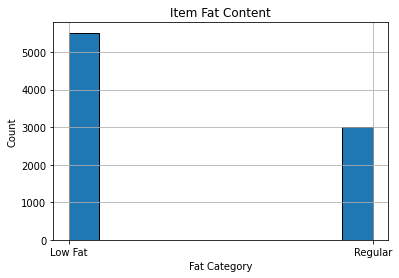

In [19]:
df['Item_Fat_Content'].hist(edgecolor='black')
plt.title('Item Fat Content')
plt.ylabel('Count')
plt.xlabel('Fat Category');

From this i can see that majority of the items are Low Fat

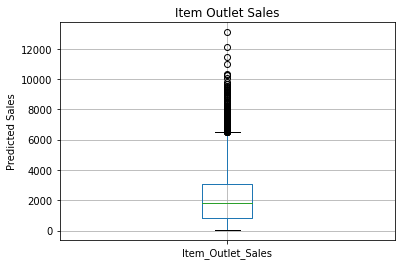

In [20]:
#Item_Outlet_Sales
df.boxplot(column = 'Item_Outlet_Sales',);
plt.title('Item Outlet Sales');
plt.ylabel('Predicted Sales');

With a boxplot on the Item sales column, I am able to see that there are a few outliers that range between 6500 and 12500 that may scew any averages that i may want to retrieve

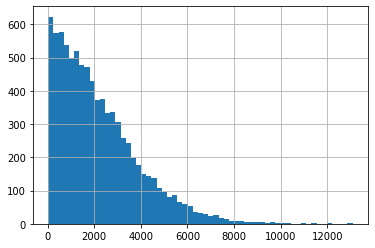

In [21]:
df['Item_Outlet_Sales'].hist(bins='auto')

In [22]:
corr = df.corr()

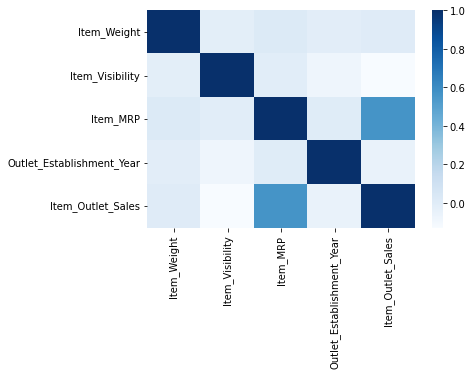

In [24]:
sns.heatmap(corr, cmap = 'Blues');